# Setup

In [1]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install rtree
!pip install geopandas
!pip install osmnx
!pip install pygeos
!pip install matplotlib==3.1.3 
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 10.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 13.2 MB/s 
     |████████████████████████████████| 6.3 MB 42.6 MB/s 
     |████████████████████████████████| 16.7 MB 50.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 3.9 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 11.2 MB 80.6 MB/s 
     |████████████████████████████████| 944 kB 69.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 15.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 12.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [7]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
import pytz
import os


from pygeos import predicates
from scipy.spatial import distance

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Load in Population Data for each POI

In [8]:
df1= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/sf_metro_csv/sf_metro_csv/sf_metro_loc_21_1_hrly_mean.csv')
df2= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/sf_metro_csv/sf_metro_csv/sf_metro_loc_21_2_hrly_mean.csv')
df3= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/sf_metro_csv/sf_metro_csv/sf_metro_loc_21_3_hrly_mean.csv')
df4= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/sf_metro_csv/sf_metro_csv/sf_metro_loc_21_4_hrly_mean.csv')
df5= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/sf_metro_csv/sf_metro_csv/sf_metro_loc_21_5_hrly_mean.csv')
df6= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/sf_metro_csv/sf_metro_csv/sf_metro_loc_21_6_hrly_mean.csv')
df7= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/sf_metro_csv/sf_metro_csv/sf_metro_loc_21_7_hrly_mean.csv')
df8= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/sf_metro_csv/sf_metro_csv/sf_metro_loc_21_8_hrly_mean.csv')
df9= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/sf_metro_csv/sf_metro_csv/sf_metro_loc_21_9_hrly_mean.csv')
df10= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/sf_metro_csv/sf_metro_csv/sf_metro_loc_21_10_hrly_mean.csv')
df11= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/sf_metro_csv/sf_metro_csv/sf_metro_loc_21_11_hrly_mean.csv')
df12= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/sf_metro_csv/sf_metro_csv/sf_metro_loc_21_12_hrly_mean.csv')

frames = [df1, df2, df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
result = pd.concat(frames)


In [9]:
result.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'popularity', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', 'mon', 'geometry',
       'index_right', 'CSAFP', 'CBSAFP', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER'],
      dtype='object')

In [10]:
sum_data=result['popularity'].str.split(',', expand=True)

In [11]:
sum_data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,1,1,1,0,0,0
1,2,2,2,2,2,2,2,3,4,4,...,3,6,20,21,16,16,2,2,4,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,2,1,8,9,...,5,5,6,5,5,2,4,1,1,2
4,9,9,9,9,9,9,9,13,13,17,...,11,8,6,11,12,8,10,10,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63997,7,7,4,2,0,0,0,0,0,4,...,10,10,30,25,20,19,13,14,14,12
63998,0,0,0,0,0,0,0,0,1,3,...,6,5,3,1,0,0,0,0,0,0
63999,26,28,32,42,44,45,43,31,46,85,...,78,79,55,32,36,34,37,33,27,24
64000,3,3,1,0,0,0,0,2,7,22,...,30,28,27,24,23,12,7,4,7,2


In [12]:
sum_data[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]] = sum_data[[0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].astype(int)

#specify the columns to sum
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

#find sum of columns specified 
sum_data['sum'] = sum_data[cols].sum(axis=1)

In [13]:
result['Popularity Sum']=sum_data['sum']

In [14]:
result

,Unnamed: 0,latitude,longitude,popularity,0,1,2,3,4,5,...,index_right,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,Popularity Sum
0,0,37.576295,-122.040698,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,0,0,0",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,488,41860,310M400US41860,41860,"San Francisco-Oakland-Hayward, CA",M1,6398144164,2475562735,6
1,2,37.974900,-122.525706,"2,2,2,2,2,2,2,3,4,4,2,4,5,3,3,6,20,21,16,16,2,...",0.064516,0.064516,0.064516,0.064516,0.064516,0.064516,...,0,488,41860,310M400US41860,41860,"San Francisco-Oakland-Hayward, CA",M1,6398144164,2475562735,132
2,3,37.925236,-122.087087,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,488,41860,310M400US41860,41860,"San Francisco-Oakland-Hayward, CA",M1,6398144164,2475562735,2
3,4,37.469778,-122.223814,"0,0,0,0,0,0,2,1,8,9,8,7,7,10,5,5,6,5,5,2,4,1,1,2",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,488,41860,310M400US41860,41860,"San Francisco-Oakland-Hayward, CA",M1,6398144164,2475562735,88
4,6,37.734948,-122.165892,"9,9,9,9,9,9,9,13,13,17,17,15,12,12,11,8,6,11,1...",0.290323,0.290323,0.290323,0.290323,0.290323,0.290323,...,0,488,41860,310M400US41860,41860,"San Francisco-Oakland-Hayward, CA",M1,6398144164,2475562735,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63997,117090,37.691042,-122.152488,"7,7,4,2,0,0,0,0,0,4,5,7,9,12,10,10,30,25,20,19...",0.225806,0.225806,0.129032,0.064516,0.000000,0.000000,...,0,488,41860,310M400US41860,41860,"San Francisco-Oakland-Hayward, CA",M1,6398144164,2475562735,224
63998,117094,37.708509,-121.912725,"0,0,0,0,0,0,0,0,1,3,5,6,9,7,6,5,3,1,0,0,0,0,0,0",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,488,41860,310M400US41860,41860,"San Francisco-Oakland-Hayward, CA",M1,6398144164,2475562735,46
63999,117095,37.723014,-122.480862,"26,28,32,42,44,45,43,31,46,85,123,134,154,114,...",0.838710,0.903226,1.032258,1.354839,1.419355,1.451613,...,0,488,41860,310M400US41860,41860,"San Francisco-Oakland-Hayward, CA",M1,6398144164,2475562735,1382
64000,117096,37.983275,-122.318866,"3,3,1,0,0,0,0,2,7,22,31,22,30,36,30,28,27,24,2...",0.096774,0.096774,0.032258,0.000000,0.000000,0.000000,...,0,488,41860,310M400US41860,41860,"San Francisco-Oakland-Hayward, CA",M1,6398144164,2475562735,321


In [15]:
active_population=result.groupby(['latitude','longitude','geometry'])['Popularity Sum'].mean().reset_index()

In [16]:
active_population = gpd.GeoDataFrame(active_population, 
                                    geometry=gpd.points_from_xy(active_population.longitude, active_population.latitude), 
                                    crs='epsg:4326')


# Load in Points

In [17]:
# Points
# Reproject to ESRI 102003
active_population= active_population.to_crs('ESRI:102003')

In [18]:
active_population["Population"]=active_population["Popularity Sum"]
active_population= active_population[["latitude","longitude", "geometry", "Population"]]

In [19]:
active_population

,latitude,longitude,geometry,Population
0,37.114316,-122.301121,POINT (-2285734.677 275110.439),3.545455
1,37.117049,-122.308620,POINT (-2286285.955 275585.415),21.333333
2,37.118894,-122.307127,POINT (-2286103.039 275748.368),18.000000
3,37.119309,-122.307581,POINT (-2286128.769 275804.021),11.333333
4,37.132324,-122.313292,POINT (-2286213.640 277344.269),26.916667
...,...,...,...,...
75858,38.249774,-122.964809,POINT (-2306252.073 413436.278),441.166667
75859,38.249981,-122.964486,POINT (-2306218.697 413450.714),416.916667
75860,38.251256,-122.882635,POINT (-2299366.282 411604.557),90.583333
75861,38.262528,-122.927247,POINT (-2302726.306 413897.887),16.833333


In [20]:
active_population["Population"].sum()

22805534.300367214

# Load in CBG Polygons

In [21]:
# Use year and geoid
year = '2021'
geoid = '41860' # San Francisco Metro

# Load in Core Based Statistical Areas (CBSAs)
cbsa = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/shared_data_LUR/data/boundaries/Core Based Statistical Areas (CBSAs)/cb_2018_us_cbsa_500k.shp')
print(cbsa.crs)

# Plot area based on id number
region =  cbsa.loc[cbsa['GEOID'] == geoid]
region_proj = region.to_crs('ESRI:102003')

region_proj_buffer=region_proj.buffer(200).to_frame('geometry')

epsg:4269


In [22]:
#Load in census block group
us_cbg=gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Data/cb_2021_06_bg_500k/cb_2021_06_bg_500k.shp")
cbg_proj = us_cbg.to_crs('ESRI:102003')

san_fran_cbg= cbg_proj.sjoin(region_proj_buffer,predicate="within")

In [23]:
san_fran_cbg

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry,index_right
2,06,001,428302,3,1500000US060014283023,060014283023,3,Block Group 3,BG,647392,130654,"POLYGON ((-2262236.938 342217.089, -2261881.37...",340
3,06,041,130204,1,1500000US060411302041,060411302041,1,Block Group 1,BG,877599,3843644,"POLYGON ((-2280211.649 363251.776, -2279823.69...",340
6,06,075,061401,3,1500000US060750614013,060750614013,3,Block Group 3,BG,136709,0,"POLYGON ((-2274663.566 346845.449, -2274339.16...",340
9,06,075,016000,2,1500000US060750160002,060750160002,2,Block Group 2,BG,73076,0,"POLYGON ((-2275423.590 350271.174, -2275284.79...",340
33,06,001,421800,2,1500000US060014218002,060014218002,2,Block Group 2,BG,252272,0,"POLYGON ((-2260764.115 357329.693, -2260704.36...",340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25559,06,001,433500,4,1500000US060014335004,060014335004,4,Block Group 4,BG,288774,0,"POLYGON ((-2256211.035 332615.359, -2255786.11...",340
25562,06,013,304007,2,1500000US060133040072,060133040072,2,Block Group 2,BG,4519321,5022,"POLYGON ((-2206050.177 345391.441, -2206006.46...",340
25567,06,075,021200,1,1500000US060750212001,060750212001,1,Block Group 1,BG,102796,0,"POLYGON ((-2277568.824 347502.831, -2277281.37...",340
25575,06,075,016101,1,1500000US060750161011,060750161011,1,Block Group 1,BG,61477,0,"POLYGON ((-2276485.792 349969.265, -2276198.14...",340


# IDW Function and Calculation for PM2.5

In [24]:
# Use year and geoid
year = '2021'
geoid = '41860' # San Francisco Metro

# Load in Core Based Statistical Areas (CBSAs)
cbsa = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/shared_data_LUR/data/boundaries/Core Based Statistical Areas (CBSAs)/cb_2018_us_cbsa_500k.shp')
print(cbsa.crs)

# Plot area based on id number
region =  cbsa.loc[cbsa['GEOID'] == geoid]
region_proj = region.to_crs('ESRI:102003')

epsg:4269


In [25]:
# Bring in csv file of previously calculated data
stations_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Averages/Averages with Lat and Long.csv")
stations_data.head()

,Station ID,latitude,longitude,Average PM Value
0,100023,37.655017,-122.473087,11.418096
1,100255,37.898709,-122.701600,7.467523
2,10092,37.857566,-121.972860,7.168577
3,100951,37.436701,-122.202417,8.481201
4,101031,37.760164,-122.470343,6.635202


In [26]:
# Drop rows with no latitude and longitude
stations_data = stations_data.dropna(subset=['latitude','longitude'])

In [27]:
# Convert the mean_station_coords dataframe to geodataframe
stations_data_gdf = gpd.GeoDataFrame(stations_data, 
                                    geometry=gpd.points_from_xy(stations_data.longitude, stations_data.latitude), 
                                    crs='epsg:4326')

In [28]:
# Reproject to ESRI 102003
stations_data_gdf= stations_data_gdf.to_crs('ESRI:102003')

In [29]:
# Get x and y coordinates of stations
x = stations_data_gdf["geometry"].x
y = stations_data_gdf['geometry'].y

# Create list of xy coordinate pairs
coords = [list(xy) for xy in zip(x, y)]

# Get PM2.5 values of stations
values = stations_data_gdf["Average PM Value"].values

# Get x and y extent of stations
min_x, min_y, max_x, max_y = region_proj.total_bounds

In [30]:
def IDW(coords, values, res, p):

    # Get x and y extent of stations
    min_x, min_y, max_x, max_y = np.array(coords)[:,0].min(), \
                                  np.array(coords)[:,1].min(), \
                                  np.array(coords)[:,0].max(), \
                                  np.array(coords)[:,1].max()

    # Create gridcells with the target resolution
    xnew = np.linspace(min_x, max_x, int((max_x - min_x) / res))
    ynew = np.linspace(min_y, max_y, int((max_y - min_y) / res))

    # Compose two 2D arrays
    # xx: x array 
    # yy: y array 
    xx, yy = np.meshgrid(xnew,ynew)

    # Create an empty numpy array that will store the interpolated values
    u = np.empty((xx.shape))

    # Compose a nested for loop that go through each grid cell
    for i in range(xx.shape[0]): # this is the index over latitude (think about this as a 2d array)
        
        for j in range(xx.shape[1]): # this is the index over longitude
            # Compose the current cell's x and y into a numpy array
            current_xy = np.array([[xx[i,j], yy[i,j]]])

            # Calculate distance between the current cell with all known points
            d = distance.cdist(current_xy, np.array(coords), 'euclidean')

            # Add the second option
            if d.min() == 0:

                # np.unravel_index(d.argmin(), d.shape) finds the smallest value's index
                # https://numpy.org/doc/stable/reference/generated/numpy.unravel_index.html
                u_ij = values[np.unravel_index(d.argmin(), d.shape)] 

            else: 
                # update the distance matrix using p
                d = d**p

                # calculate weight
                w = 1.0 / d

                # calculate the interpolated value for the chosen cell 
                u_ij = np.sum(w * values) / np.sum(w)

            # update the value of current cell in the numpy array
            u[i, j] = u_ij

    return u, xx, yy

In [31]:
# Set res and p
res = 1000 # 1km
p = 1

# Call the IDW function that we just defined
u, xx, yy = IDW(coords, values, res, p)

In [32]:
# check the size of xx and yy now
xx.shape, yy.shape

((182, 104), (182, 104))

In [33]:
u.flatten().shape

(18928,)

In [34]:
# Convert our interpolation results into a point-based geodataframe
from shapely.geometry import Polygon

interp_gdf = gpd.GeoDataFrame(u.flatten(), 
                              geometry=gpd.points_from_xy(xx.flatten(), 
                                                          yy.flatten()), 
                              crs='ESRI:102003')

for index in interp_gdf.index:
  x, y = interp_gdf.loc[index,'geometry'].x, interp_gdf.loc[index,'geometry'].y
  minx = x - res/2
  miny = y - res/2
  maxx = x + res/2
  maxy = y + res/2
  
  poly = Polygon([[minx,miny],[maxx, miny],[maxx, maxy],[minx, maxy]])
  interp_gdf.loc[index,'poly_geom'] = poly

interp_gdf['geometry'] = interp_gdf['poly_geom']

In [35]:
# Rename column
interp_gdf= interp_gdf.rename(columns={0: "PM 2.5 Average" })

In [36]:
interp_gdf

,PM 2.5 Average,geometry,poly_geom
0,7.988468,"POLYGON ((-2306938.085 247815.521, -2305938.08...",POLYGON ((-2306938.085321138 247815.5211053359...
1,7.987973,"POLYGON ((-2305921.007 247815.521, -2304921.00...",POLYGON ((-2305921.0071251485 247815.521105335...
2,7.987494,"POLYGON ((-2304903.929 247815.521, -2303903.92...",POLYGON ((-2304903.928929159 247815.5211053359...
3,7.987034,"POLYGON ((-2303886.851 247815.521, -2302886.85...",POLYGON ((-2303886.8507331694 247815.521105335...
4,7.986594,"POLYGON ((-2302869.773 247815.521, -2301869.77...",POLYGON ((-2302869.7725371798 247815.521105335...
...,...,...,...
18923,8.143009,"POLYGON ((-2206247.344 430709.816, -2205247.34...",POLYGON ((-2206247.343918163 430709.8158451803...
18924,8.143666,"POLYGON ((-2205230.266 430709.816, -2204230.26...",POLYGON ((-2205230.2657221733 430709.815845180...
18925,8.144295,"POLYGON ((-2204213.188 430709.816, -2203213.18...",POLYGON ((-2204213.1875261837 430709.815845180...
18926,8.144896,"POLYGON ((-2203196.109 430709.816, -2202196.10...",POLYGON ((-2203196.109330194 430709.8158451803...


In [37]:
# Rename column
interp_gdf= interp_gdf.rename(columns={0: "PM 2.5 Average" })

In [38]:
san_fran_cbg

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry,index_right
2,06,001,428302,3,1500000US060014283023,060014283023,3,Block Group 3,BG,647392,130654,"POLYGON ((-2262236.938 342217.089, -2261881.37...",340
3,06,041,130204,1,1500000US060411302041,060411302041,1,Block Group 1,BG,877599,3843644,"POLYGON ((-2280211.649 363251.776, -2279823.69...",340
6,06,075,061401,3,1500000US060750614013,060750614013,3,Block Group 3,BG,136709,0,"POLYGON ((-2274663.566 346845.449, -2274339.16...",340
9,06,075,016000,2,1500000US060750160002,060750160002,2,Block Group 2,BG,73076,0,"POLYGON ((-2275423.590 350271.174, -2275284.79...",340
33,06,001,421800,2,1500000US060014218002,060014218002,2,Block Group 2,BG,252272,0,"POLYGON ((-2260764.115 357329.693, -2260704.36...",340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25559,06,001,433500,4,1500000US060014335004,060014335004,4,Block Group 4,BG,288774,0,"POLYGON ((-2256211.035 332615.359, -2255786.11...",340
25562,06,013,304007,2,1500000US060133040072,060133040072,2,Block Group 2,BG,4519321,5022,"POLYGON ((-2206050.177 345391.441, -2206006.46...",340
25567,06,075,021200,1,1500000US060750212001,060750212001,1,Block Group 1,BG,102796,0,"POLYGON ((-2277568.824 347502.831, -2277281.37...",340
25575,06,075,016101,1,1500000US060750161011,060750161011,1,Block Group 1,BG,61477,0,"POLYGON ((-2276485.792 349969.265, -2276198.14...",340


In [39]:
# Drop column called index_right
san_fran_cbg=san_fran_cbg.drop(columns=['index_right'])

In [40]:
# Spatial join of cbg and pm averages
area_interp= san_fran_cbg.sjoin(interp_gdf)

In [41]:
area_interp=area_interp.drop(columns=['index_right'])

In [42]:
area_interp

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry,PM 2.5 Average,poly_geom
2,06,001,428302,3,1500000US060014283023,060014283023,3,Block Group 3,BG,647392,130654,"POLYGON ((-2262236.938 342217.089, -2261881.37...",8.521692,POLYGON ((-2263203.722893583 340778.3670504502...
7157,06,001,428302,1,1500000US060014283021,060014283021,1,Block Group 1,BG,727957,344116,"POLYGON ((-2263160.533 341984.329, -2262236.93...",8.521692,POLYGON ((-2263203.722893583 340778.3670504502...
9757,06,001,428301,3,1500000US060014283013,060014283013,3,Block Group 3,BG,145413,0,"POLYGON ((-2262261.398 340940.851, -2262139.50...",8.521692,POLYGON ((-2263203.722893583 340778.3670504502...
14994,06,001,428301,4,1500000US060014283014,060014283014,4,Block Group 4,BG,3438743,1597298,"POLYGON ((-2263084.640 341322.831, -2262521.05...",8.521692,POLYGON ((-2263203.722893583 340778.3670504502...
25179,06,001,428302,2,1500000US060014283022,060014283022,2,Block Group 2,BG,856061,0,"POLYGON ((-2262465.973 341340.049, -2262204.96...",8.521692,POLYGON ((-2263203.722893583 340778.3670504502...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25436,06,041,106001,1,1500000US060411060011,060411060011,1,Block Group 1,BG,10407922,1617909,"POLYGON ((-2277668.246 378934.432, -2277136.17...",7.937070,POLYGON ((-2274391.5830494696 378165.598571854...
25436,06,041,106001,1,1500000US060411060011,060411060011,1,Block Group 1,BG,10407922,1617909,"POLYGON ((-2277668.246 378934.432, -2277136.17...",7.915015,POLYGON ((-2275408.661245459 378165.5985718549...
25436,06,041,106001,1,1500000US060411060011,060411060011,1,Block Group 1,BG,10407922,1617909,"POLYGON ((-2277668.246 378934.432, -2277136.17...",7.943886,POLYGON ((-2274391.5830494696 379176.064288649...
25436,06,041,106001,1,1500000US060411060011,060411060011,1,Block Group 1,BG,10407922,1617909,"POLYGON ((-2277668.246 378934.432, -2277136.17...",7.920749,POLYGON ((-2275408.661245459 379176.0642886496...


# Spatial Join

In [43]:
pointInPoly = gpd.sjoin(area_interp, active_population) 

In [44]:
pointInPoly

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,NAMELSAD,LSAD,ALAND,AWATER,geometry,PM 2.5 Average,poly_geom,index_right,latitude,longitude,Population
2,06,001,428302,3,1500000US060014283023,060014283023,3,Block Group 3,BG,647392,130654,"POLYGON ((-2262236.938 342217.089, -2261881.37...",8.521692,POLYGON ((-2263203.722893583 340778.3670504502...,29651,37.747676,-122.239916,491.000000
2,06,001,428302,3,1500000US060014283023,060014283023,3,Block Group 3,BG,647392,130654,"POLYGON ((-2262236.938 342217.089, -2261881.37...",8.520353,POLYGON ((-2262186.6446975935 340778.367050450...,29651,37.747676,-122.239916,491.000000
2,06,001,428302,3,1500000US060014283023,060014283023,3,Block Group 3,BG,647392,130654,"POLYGON ((-2262236.938 342217.089, -2261881.37...",8.523601,POLYGON ((-2263203.722893583 341788.8327672449...,29651,37.747676,-122.239916,491.000000
2,06,001,428302,3,1500000US060014283023,060014283023,3,Block Group 3,BG,647392,130654,"POLYGON ((-2262236.938 342217.089, -2261881.37...",8.590442,POLYGON ((-2262186.6446975935 341788.832767244...,29651,37.747676,-122.239916,491.000000
2,06,001,428302,3,1500000US060014283023,060014283023,3,Block Group 3,BG,647392,130654,"POLYGON ((-2262236.938 342217.089, -2261881.37...",8.481582,POLYGON ((-2261169.566501604 340778.3670504502...,29651,37.747676,-122.239916,491.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25173,06,081,613600,4,1500000US060816136004,060816136004,4,Block Group 4,BG,3266012,0,"POLYGON ((-2290190.322 327000.718, -2290082.13...",8.008995,POLYGON ((-2290664.8341853037 326631.847015324...,8531,37.552131,-122.511790,128.583333
25173,06,081,613600,4,1500000US060816136004,060816136004,4,Block Group 4,BG,3266012,0,"POLYGON ((-2290190.322 327000.718, -2290082.13...",7.963472,POLYGON ((-2287613.599597335 327642.3127321189...,8531,37.552131,-122.511790,128.583333
25173,06,081,613600,4,1500000US060816136004,060816136004,4,Block Group 4,BG,3266012,0,"POLYGON ((-2290190.322 327000.718, -2290082.13...",7.958883,POLYGON ((-2287613.599597335 326631.8470153241...,8531,37.552131,-122.511790,128.583333
25173,06,081,613600,4,1500000US060816136004,060816136004,4,Block Group 4,BG,3266012,0,"POLYGON ((-2290190.322 327000.718, -2290082.13...",7.964376,POLYGON ((-2288630.6777933245 325621.381298529...,8531,37.552131,-122.511790,128.583333


In [45]:
#pointInPolyCBG=pointInPoly.groupby(['GEOID'])['Population'].sum().reset_index()
pointInPolyCBG=pointInPoly.groupby(['GEOID'], as_index=False).agg({'Population': 'sum', 
                                                                   'PM 2.5 Average': 'first',
                                                                   'latitude': 'first', 'longitude': 'first',
                                                                   'poly_geom': 'first', 'geometry': 'first'})


In [46]:
pointInPolyCBG

,GEOID,Population,PM 2.5 Average,latitude,longitude,poly_geom,geometry
0,060014001001,6.572482e+04,8.136273,37.860359,-122.234383,POLYGON ((-2258118.331913635 352903.9556519869...,"POLYGON ((-2257580.968 356942.820, -2257271.75..."
1,060014001002,9.140833e+03,8.178260,37.860165,-122.218901,POLYGON ((-2258118.331913635 351893.4899351921...,"POLYGON ((-2257494.321 353219.853, -2257090.11..."
2,060014002001,8.434207e+03,8.169232,37.847210,-122.252252,POLYGON ((-2259135.4101096247 352903.955651986...,"POLYGON ((-2259135.177 353198.029, -2259105.27..."
3,060014002002,1.438049e+04,8.251488,37.845315,-122.252102,POLYGON ((-2259135.4101096247 351893.489935192...,"POLYGON ((-2259753.747 352635.746, -2259603.41..."
4,060014003001,4.778391e+03,8.251488,37.840310,-122.251205,POLYGON ((-2259135.4101096247 351893.489935192...,"POLYGON ((-2259236.958 352681.447, -2258800.36..."
...,...,...,...,...,...,...,...
3107,060816139005,1.399208e+04,7.961845,37.454956,-122.164230,POLYGON ((-2263203.722893583 308443.4641130192...,"POLYGON ((-2264331.923 309436.673, -2264294.06..."
3108,060816140001,7.643167e+03,8.093290,37.621388,-122.447846,POLYGON ((-2282528.2086173864 333705.107032887...,"POLYGON ((-2282756.708 334591.799, -2282735.27..."
3109,060816140002,3.994977e+04,8.135277,37.620443,-122.454328,POLYGON ((-2283545.2868133765 334715.572749681...,"POLYGON ((-2284180.732 334838.044, -2284082.19..."
3110,060816140004,3.551167e+03,8.135277,37.633310,-122.459703,POLYGON ((-2283545.2868133765 334715.572749681...,"POLYGON ((-2284253.309 335222.957, -2284238.65..."


In [47]:
pointInPolyCBG["Population"].max()

19153651.038961038

# Calculate Mobility Population Weighted Exposure and Plot

In [48]:
total_pop= pointInPolyCBG["Population"].sum()
total_pop

187451740.03253907

In [49]:
# Calculate exposure
pointInPolyCBG['Mobility Pop Weighted Exposure'] = pointInPolyCBG['PM 2.5 Average'] * ((pointInPolyCBG["Population"]/total_pop))

In [50]:
pointInPolyCBG

,GEOID,Population,PM 2.5 Average,latitude,longitude,poly_geom,geometry,Mobility Pop Weighted Exposure
0,060014001001,6.572482e+04,8.136273,37.860359,-122.234383,POLYGON ((-2258118.331913635 352903.9556519869...,"POLYGON ((-2257580.968 356942.820, -2257271.75...",0.002853
1,060014001002,9.140833e+03,8.178260,37.860165,-122.218901,POLYGON ((-2258118.331913635 351893.4899351921...,"POLYGON ((-2257494.321 353219.853, -2257090.11...",0.000399
2,060014002001,8.434207e+03,8.169232,37.847210,-122.252252,POLYGON ((-2259135.4101096247 352903.955651986...,"POLYGON ((-2259135.177 353198.029, -2259105.27...",0.000368
3,060014002002,1.438049e+04,8.251488,37.845315,-122.252102,POLYGON ((-2259135.4101096247 351893.489935192...,"POLYGON ((-2259753.747 352635.746, -2259603.41...",0.000633
4,060014003001,4.778391e+03,8.251488,37.840310,-122.251205,POLYGON ((-2259135.4101096247 351893.489935192...,"POLYGON ((-2259236.958 352681.447, -2258800.36...",0.000210
...,...,...,...,...,...,...,...,...
3107,060816139005,1.399208e+04,7.961845,37.454956,-122.164230,POLYGON ((-2263203.722893583 308443.4641130192...,"POLYGON ((-2264331.923 309436.673, -2264294.06...",0.000594
3108,060816140001,7.643167e+03,8.093290,37.621388,-122.447846,POLYGON ((-2282528.2086173864 333705.107032887...,"POLYGON ((-2282756.708 334591.799, -2282735.27...",0.000330
3109,060816140002,3.994977e+04,8.135277,37.620443,-122.454328,POLYGON ((-2283545.2868133765 334715.572749681...,"POLYGON ((-2284180.732 334838.044, -2284082.19...",0.001734
3110,060816140004,3.551167e+03,8.135277,37.633310,-122.459703,POLYGON ((-2283545.2868133765 334715.572749681...,"POLYGON ((-2284253.309 335222.957, -2284238.65...",0.000154


In [51]:
pointInPolyCBG.to_csv(r'/content/drive/MyDrive/Colab Notebooks/Data/Mobility Population Weighted.csv') 

In [52]:
min_exposure=pointInPolyCBG['Mobility Pop Weighted Exposure'].min()
max_exposure=pointInPolyCBG['Mobility Pop Weighted Exposure'].max()

In [53]:
from geopandas import GeoDataFrame

merged = GeoDataFrame(pointInPolyCBG)

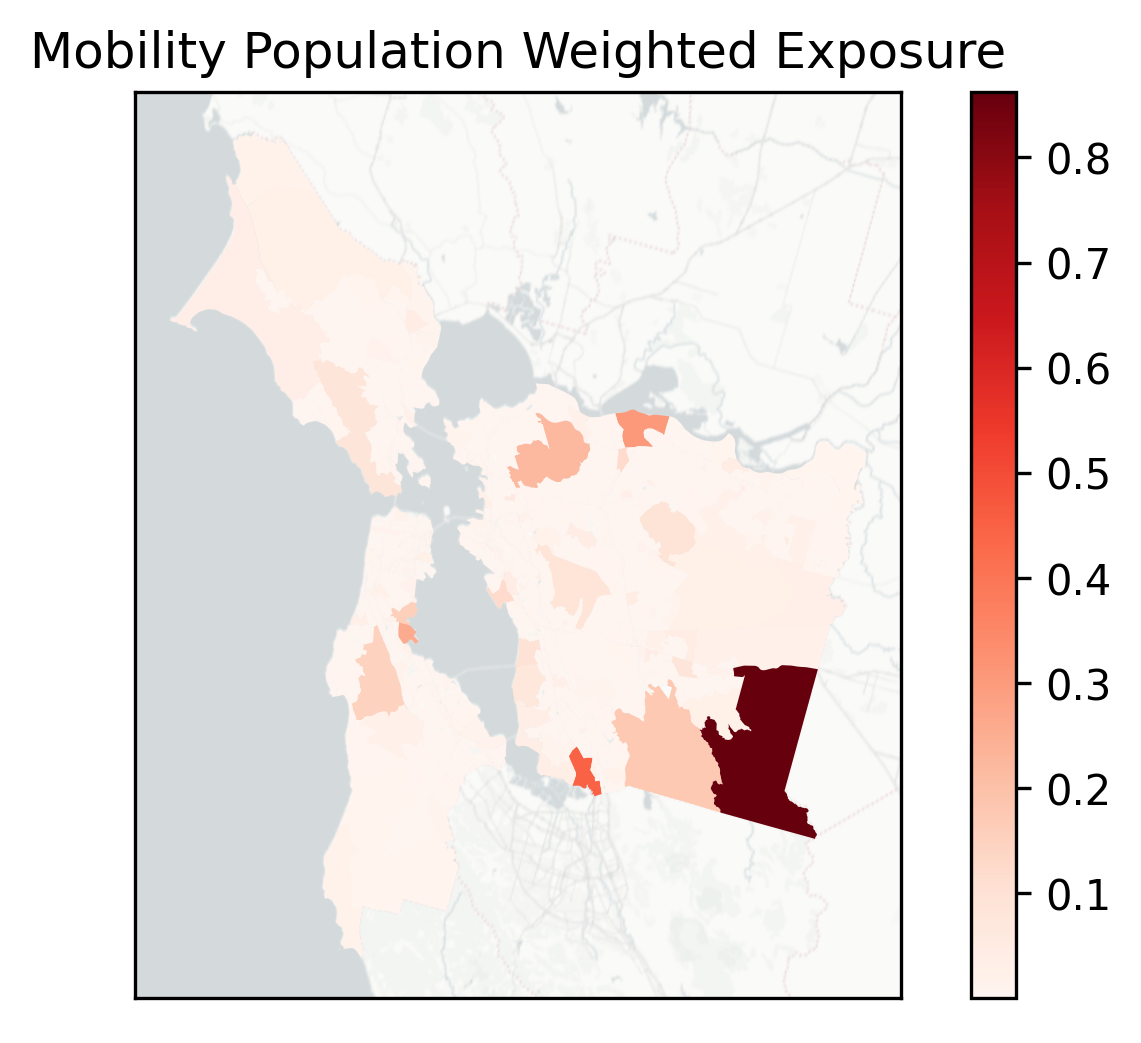

In [54]:
import contextily

# Active Population Weighted Exposure
fig, ax  = plt.subplots(dpi=300)

# Figure 1- Total
merged.plot(column=('Mobility Pop Weighted Exposure'),markersize=1, ax=ax, cmap="Reds")
ax.set_title("Mobility Population Weighted Exposure", fontsize=12)
contextily.add_basemap(ax=ax, crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)


sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=min_exposure, vmax=max_exposure))
sm.set_array([])
plt.colorbar(sm)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


In [ ]:
merged.quantile(0.8)


Population                        32620.867835
PM 2.5 Average                        8.414214
latitude                             37.914805
longitude                          -122.034114
Mobility Pop Weighted Exposure        0.001437
Name: 0.8, dtype: float64

In [ ]:
merged.quantile(0.9)

Population                        84754.876288
PM 2.5 Average                        8.497559
latitude                             37.972011
longitude                          -121.922223
Mobility Pop Weighted Exposure        0.003675
Name: 0.9, dtype: float64

In [ ]:
merged.quantile(0.95)

Population                        163381.655480
PM 2.5 Average                         8.573884
latitude                              38.000517
longitude                           -121.807534
Mobility Pop Weighted Exposure         0.007234
Name: 0.95, dtype: float64

In [55]:
# 80-90
selected_pop_weighted=merged.loc[merged['Mobility Pop Weighted Exposure'] >=  0.001437]
selected_pop_weighted=selected_pop_weighted.loc[selected_pop_weighted['Mobility Pop Weighted Exposure']<= 0.003675]

In [56]:
#90-95
selected_pop_weighted_90=merged.loc[merged['Mobility Pop Weighted Exposure'] >= 0.003675]
selected_pop_weighted_90_95=selected_pop_weighted_90.loc[selected_pop_weighted_90['Mobility Pop Weighted Exposure'] <= 0.007234]

In [57]:
#95-100
selected_pop_weighted_95_100=merged.loc[merged['Mobility Pop Weighted Exposure'] >= 0.007234]

In [ ]:
roads = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/Roads/tl_2021_06_prisecroads.shp')
roads_proj = roads.to_crs('ESRI:102003')

region_roads_proj = gpd.clip(roads_proj, region_proj)

In [ ]:
us_rails = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data/Rail/tl_2021_us_rails.shp')
us_rails_proj = us_rails.to_crs('ESRI:102003')
region_rails_proj = gpd.clip(us_rails_proj,region_proj)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


Text(0.5, 1.0, 'Mobility Population Quantiles')

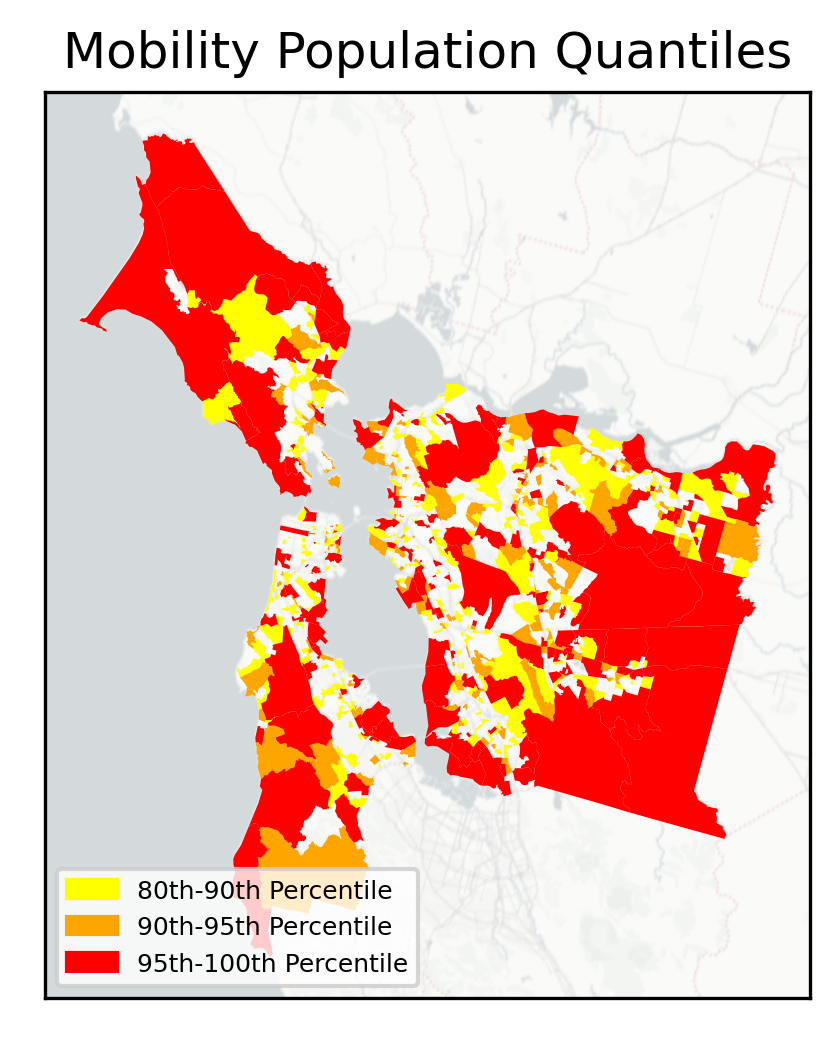

In [58]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, 1, dpi=300)

selected_pop_weighted.plot(ax=ax,column=('Mobility Pop Weighted Exposure'), color="yellow")
selected_pop_weighted_90_95.plot(ax=ax,column=('Mobility Pop Weighted Exposure'), color="orange")
selected_pop_weighted_95_100.plot(ax=ax,column=('Mobility Pop Weighted Exposure'), color="red")

contextily.add_basemap(ax=ax,crs=san_fran_cbg.crs,  source=contextily.providers.CartoDB.PositronNoLabels)

yellow_patch = mpatches.Patch(color='yellow', label='80th-90th Percentile')
orange_patch = mpatches.Patch(color='orange', label='90th-95th Percentile')
red_patch = mpatches.Patch(color='red', label='95th-100th Percentile')
ax.legend(handles=[yellow_patch, orange_patch, red_patch], loc='lower left',
          prop={'size': 6})

plt.yticks([])
plt.xticks([])
plt.title("Mobility Population Quantiles")


In [ ]:
region_roads_proj.plot(ax=ax, linewidth=0.1, markersize=0, color="blue")
region_rails_proj.plot(ax=ax, linewidth=0.2, markersize=0, color="green")

<Figure size 432x288 with 0 Axes>